In [22]:
# Download dataset
!wget --no-check-certificate \
 https://download1351.mediafire.com/5wz51mr091jg/34j57vjrtbb199a/daun_tomat.zip \
    -O /tmp/daun_tomat.zip


--2022-01-22 16:43:06--  https://download1351.mediafire.com/5wz51mr091jg/34j57vjrtbb199a/daun_tomat.zip
Resolving download1351.mediafire.com (download1351.mediafire.com)... 205.196.123.39
Connecting to download1351.mediafire.com (download1351.mediafire.com)|205.196.123.39|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7196111 (6.9M) [application/zip]
Saving to: ‘/tmp/daun_tomat.zip’

/tmp/daun_tomat.zip 100%[===================>]   6.86M  9.77MB/s    in 0.7s    

2022-01-22 16:43:07 (9.77 MB/s) - ‘/tmp/daun_tomat.zip’ saved [7196111/7196111]



In [23]:
import os
import zipfile

local_zip = '/tmp/daun_tomat.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [24]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/daun_tomat'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [25]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [26]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)


In [27]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (200, 150, 150, 3)
Train Label =  (200,)
Validation Data =  (200, 150, 150, 3)
Validation Label =  (200,)


In [28]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [118 126 139]
Data setelah di-normalisasi  [0.4627451  0.49411765 0.54509807]


In [29]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  []
Label setelah di-encoder  []


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [31]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [32]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [33]:
# Print model summary
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 38, 38, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [35]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

In [36]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
10/10 [==============================] - 7s 616ms/step - loss: -52.9341 - acc: 0.2400 - val_loss: -184.0858 - val_acc: 0.2500
Epoch 2/15
10/10 [==============================] - 6s 573ms/step - loss: -782.9880 - acc: 0.2500 - val_loss: -2353.8564 - val_acc: 0.2500
Epoch 3/15
10/10 [==============================] - 6s 575ms/step - loss: -7053.9917 - acc: 0.2500 - val_loss: -16364.1250 - val_acc: 0.2500
Epoch 4/15
10/10 [==============================] - 6s 577ms/step - loss: -33909.2266 - acc: 0.2500 - val_loss: -80315.4453 - val_acc: 0.2500
Epoch 5/15
10/10 [==============================] - 6s 572ms/step - loss: -146982.5781 - acc: 0.2500 - val_loss: -272569.4062 - val_acc: 0.2500
Epoch 6/15
10/10 [==============================] - 6s 572ms/step - loss: -528236.6250 - acc: 0.2500 - val_loss: -805279.6875 - val_acc: 0.2500
Epoch 7/15
10/10 [==============================] - 6s 567ms/step - loss: -1267585.1250 - acc: 0.2500 - val_loss: -2199242.5000 - val_acc: 0.2500
Epoch 8

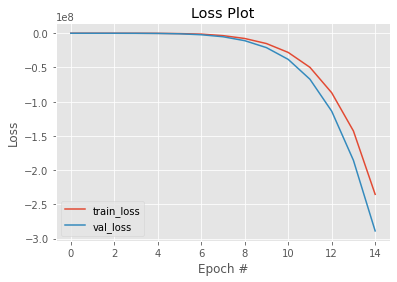

In [37]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

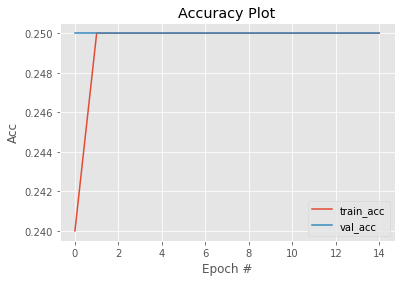

In [38]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.25      1.00      0.40        50
           2       0.00      0.00      0.00        50
           3       0.00      0.00      0.00        50

    accuracy                           0.25       200
   macro avg       0.06      0.25      0.10       200
weighted avg       0.06      0.25      0.10       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
